# Le dataset

Dans ce challenge on utilisera le dataset que tu as exporté en terminant la quête **Yuka 1**.

Dans cette partie tu vas mener une analyse exploratoire pour atteindre ton objectif qui est de répondre à la question : "Cet aliment est-il sain ou non ?"

Les colonnes les plus informatives sont les suivantes :
- nutrition-score-fr_100g
- nutrition-score-uk_100g
- pnns_groups_1
- pnns_groups_2

Propose une analyse exploratoire pour répondre à la question de la problématique. Fait des visualisations pour illustrer ton travail, utilise l'analyse univariée et bivariée. Bref, fait un vrai travail de data analyst, clair et synthétique dans lequel tu expliques ton raisonnement.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('YukaFrance.csv', low_memory=False)
dfusa = pd.read_csv('YukaUSA.csv', low_memory=False)

In [3]:
display(df.info())
display(dfusa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94392 entries, 0 to 94391
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     94392 non-null  object 
 1   url                      94392 non-null  object 
 2   creator                  94392 non-null  object 
 3   created_t                94392 non-null  int64  
 4   created_datetime         94392 non-null  object 
 5   last_modified_t          94392 non-null  int64  
 6   last_modified_datetime   94392 non-null  object 
 7   product_name             87398 non-null  object 
 8   quantity                 67730 non-null  object 
 9   brands                   82530 non-null  object 
 10  brands_tags              82526 non-null  object 
 11  categories               58752 non-null  object 
 12  categories_tags          58752 non-null  object 
 13  categories_fr            58752 non-null  object 
 14  countries             

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172998 entries, 0 to 172997
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     172998 non-null  int64  
 1   url                                      172998 non-null  object 
 2   creator                                  172998 non-null  object 
 3   created_t                                172998 non-null  int64  
 4   created_datetime                         172998 non-null  object 
 5   last_modified_t                          172998 non-null  int64  
 6   last_modified_datetime                   172998 non-null  object 
 7   product_name                             172506 non-null  object 
 8   brands                                   171486 non-null  object 
 9   brands_tags                              171486 non-null  object 
 10  countries                       

None

In [4]:
df.dropna(subset=['nutrition-score-fr_100g'], inplace=True) # on supprime les lignes avec des valeurs manquantes
df.dropna(subset=['product_name'], inplace=True)
dfusa.dropna(subset=['nutrition-score-fr_100g'], inplace=True)
dfusa.dropna(subset=['product_name'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58204 entries, 10 to 94388
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     58204 non-null  object 
 1   url                      58204 non-null  object 
 2   creator                  58204 non-null  object 
 3   created_t                58204 non-null  int64  
 4   created_datetime         58204 non-null  object 
 5   last_modified_t          58204 non-null  int64  
 6   last_modified_datetime   58204 non-null  object 
 7   product_name             58204 non-null  object 
 8   quantity                 42834 non-null  object 
 9   brands                   58041 non-null  object 
 10  brands_tags              58041 non-null  object 
 11  categories               41925 non-null  object 
 12  categories_tags          41925 non-null  object 
 13  categories_fr            41925 non-null  object 
 14  countries                5

In [5]:
dfusa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139005 entries, 0 to 172996
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     139005 non-null  int64  
 1   url                                      139005 non-null  object 
 2   creator                                  139005 non-null  object 
 3   created_t                                139005 non-null  int64  
 4   created_datetime                         139005 non-null  object 
 5   last_modified_t                          139005 non-null  int64  
 6   last_modified_datetime                   139005 non-null  object 
 7   product_name                             139005 non-null  object 
 8   brands                                   138236 non-null  object 
 9   brands_tags                              138236 non-null  object 
 10  countries                            

In [6]:
dfbonnenoteFR = df[df['nutrition-score-fr_100g'] < 0]
dfbonnenoteUSA = dfusa[dfusa['nutrition-score-fr_100g'] < 0]

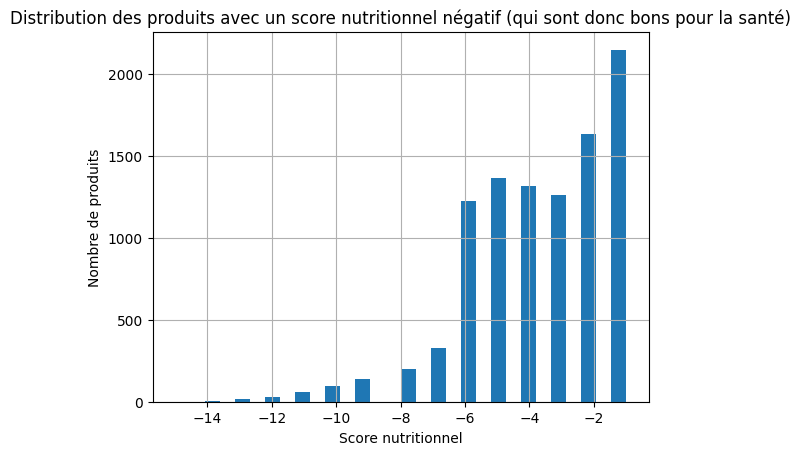

In [7]:
dfbonnenoteFR = df[df['nutrition-score-fr_100g'] < 0]
dfbonnenoteFR.describe()
dfbonnenoteFR['nutrition-score-fr_100g'].hist(bins=30)
plt.title('Distribution des produits avec un score nutritionnel négatif (qui sont donc bons pour la santé)')
plt.xlabel('Score nutritionnel')
plt.ylabel('Nombre de produits')
plt.show()


In [15]:
print(df.value_counts('nutrition-score-fr_100g').sum())
print(dfbonnenoteFR.value_counts('nutrition-score-fr_100g').sum())

58204
9813


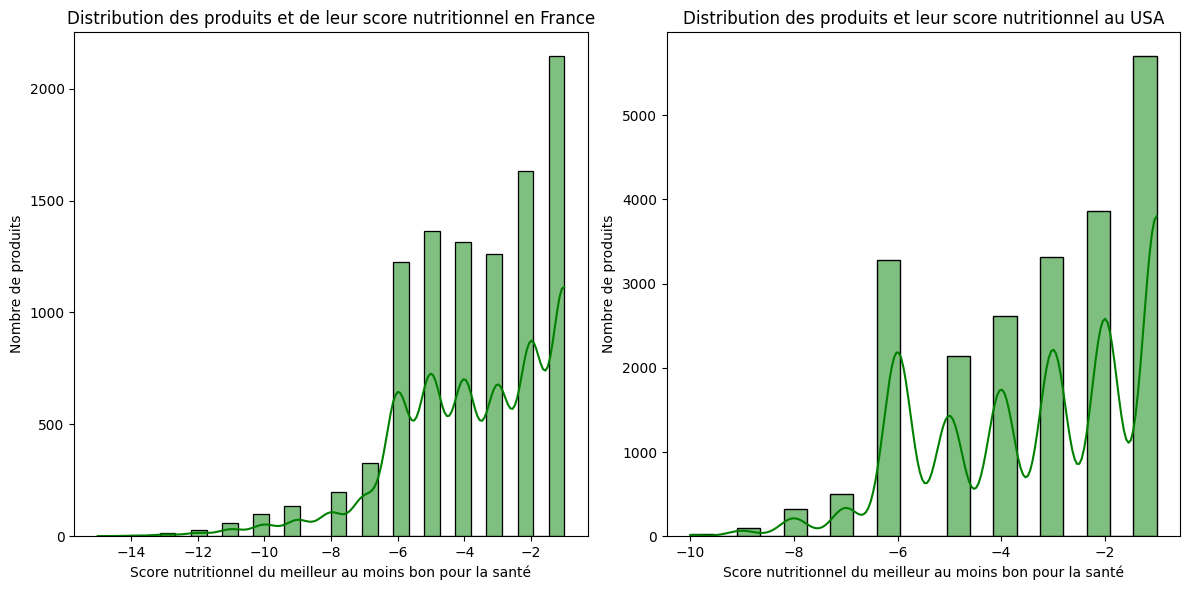

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Histogramme pour le score nutritionnel en France
sns.histplot(dfbonnenoteFR['nutrition-score-fr_100g'], bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution des produits et de leur score nutritionnel en France')
axes[0].set_xlabel('Score nutritionnel du meilleur au moins bon pour la santé')
axes[0].set_ylabel('Nombre de produits')

# Histogramme pour le score nutritionnel au Royaume-Uni
sns.histplot(dfbonnenoteUSA['nutrition-score-fr_100g'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution des produits et leur score nutritionnel au USA')
axes[1].set_xlabel('Score nutritionnel du meilleur au moins bon pour la santé')
axes[1].set_ylabel('Nombre de produits')

# Affichage des graphiques
plt.tight_layout()
plt.show()

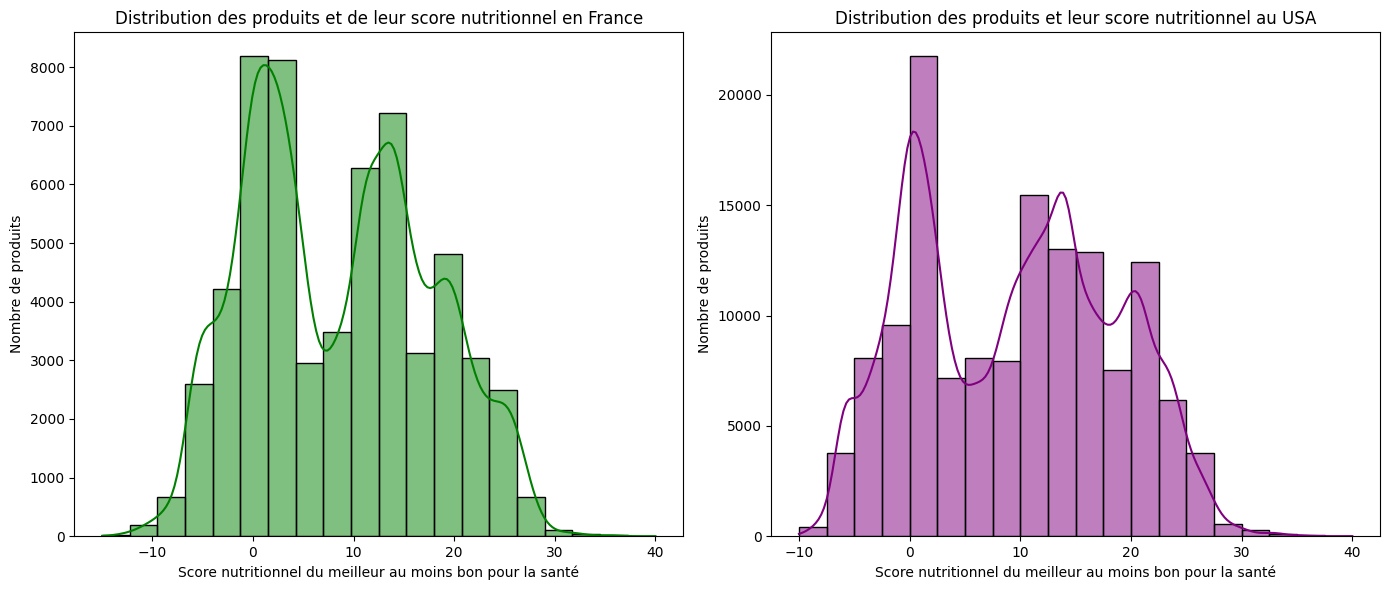

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Histogramme pour le score nutritionnel en France
sns.histplot(df['nutrition-score-fr_100g'], bins=20, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution des produits et de leur score nutritionnel en France')
axes[0].set_xlabel('Score nutritionnel du meilleur au moins bon pour la santé')
axes[0].set_ylabel('Nombre de produits')

# Histogramme pour le score nutritionnel au USA
sns.histplot(dfusa['nutrition-score-fr_100g'], bins=20, kde=True, color='purple', ax=axes[1])
axes[1].set_title('Distribution des produits et leur score nutritionnel au USA')
axes[1].set_xlabel('Score nutritionnel du meilleur au moins bon pour la santé')
axes[1].set_ylabel('Nombre de produits')

# Affichage des graphiques
plt.tight_layout()
plt.show()

D'après les deux graphiques comparant la distribution des produits et leur score nutritionnel en France et aux États-Unis, on peut faire les déductions suivantes :

1. La distribution des produits en termes de score nutritionnel est similaire dans les deux pays. Les deux graphiques montrent une forme de distribution en cloche, avec un pic au centre et une diminution progressive des produits ayant des scores nutritionnels plus élevés ou plus faibles.

2. En France, il semble y avoir une plus grande concentration de produits avec des scores nutritionnels plus élevés par rapport aux États-Unis. Cela peut indiquer que la France a une plus grande proportion de produits moins sains ou moins nutritifs par rapport aux États-Unis.

3. Aux États-Unis, il y a une plus grande dispersion des scores nutritionnels, avec une queue plus longue de produits ayant des scores nutritionnels plus élevés. Cela peut indiquer une plus grande variété de produits alimentaires disponibles, allant des produits très sains aux produits moins sains.

4. Dans les deux pays, il y a une concentration de produits avec des scores nutritionnels autour de zéro, ce qui peut indiquer une proportion importante de produits considérés comme moyennement sains ou neutres sur le plan nutritionnel.

Il est important de noter que ces déductions sont basées sur les informations fournies dans les graphiques et peuvent varier en fonction de la méthodologie utilisée pour calculer les scores nutritionnels et des échantillons de produits inclus dans l'analyse.

In [67]:
filtered_df = df.loc[(df['nutrition-score-fr_100g'] >= -15) & (df['nutrition-score-fr_100g'] <= -1)]

produits = []

for score in range(-15, 0):
    product = filtered_df[filtered_df['nutrition-score-fr_100g'] == score]
    if not product.empty:
        produits.append(product.iloc[0])

df_produits = pd.DataFrame(produits)
df_produits = df_produits[['product_name', 'nutrition-score-fr_100g', 'pnns_groups_1', 'pnns_groups_2']]
df_produits = df_produits.rename(columns={
    'product_name': 'Nom du produit',
    'nutrition-score-fr_100g': 'Score nutritionnel (FR)',
    'pnns_groups_1': 'Groupe PNNS 1',
    'pnns_groups_2': 'Groupe PNNS 2'
})
print("Les produits les plus sains en France, selon Yuka :")
df_produits

Les produits les plus sains en France, selon Yuka :


,Nom du produit,Score nutritionnel (FR),Groupe PNNS 1,Groupe PNNS 2
49596,Pois chiches,-15.0,Fruits and vegetables,Vegetables
20673,Choux-fleurs en fleurettes,-14.0,fruits-and-vegetables,vegetables
14152,Fèves fines,-13.0,fruits-and-vegetables,vegetables
8271,Lentilles préparées,-12.0,Composite foods,One-dish meals
4062,Haricots verts extra fin,-11.0,fruits-and-vegetables,vegetables
2101,Savarez - Jeu De Cordes,-10.0,NaN,NaN
1878,Casino Bio - Maïs doux,-9.0,Cereals and potatoes,Cereals
2550,Mesclun (5/6 portions),-8.0,Fruits and vegetables,Vegetables
3497,"Tomacouli 100% tomates fraîches, nature",-7.0,Fat and sauces,Dressings and sauces
281,Tomates jaunes entières pelées au jus,-6.0,Fruits and vegetables,Vegetables


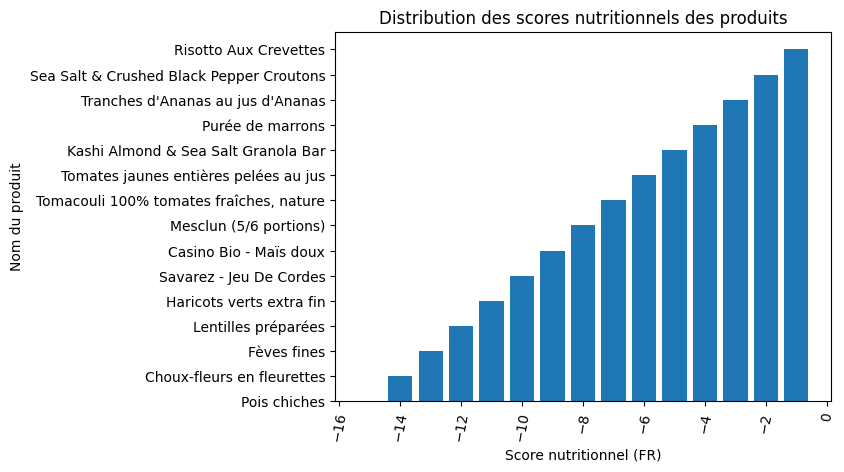

In [68]:
# On prépare les données pour le graphique
product_names = df_produits['Nom du produit'].astype(str)
scores = df_produits['Score nutritionnel (FR)']

# Graphique en barres
plt.bar(scores, product_names)
plt.xlabel('Score nutritionnel (FR)')
plt.ylabel('Nom du produit')
plt.title('Distribution des scores nutritionnels des produits')

# On fait pivoter les noms de produits pour qu'ils soient lisibles
plt.xticks(rotation=80)

plt.show()

In [38]:
filtered_dfusa = dfusa.loc[(dfusa['nutrition-score-fr_100g'] >= -15) & (dfusa['nutrition-score-fr_100g'] <= -1)]

produits = []

for score in range(-15, 0):
    product = filtered_dfusa[filtered_dfusa['nutrition-score-fr_100g'] == score]
    if not product.empty:
        produits.append(product.iloc[0])

dfusa_produits = pd.DataFrame(produits)
dfusa_produits = dfusa_produits[['product_name', 'nutrition-score-fr_100g', 'pnns_groups_1', 'pnns_groups_2']]
dfusa_produits = dfusa_produits.rename(columns={
    'product_name': 'Nom du produit',
    'nutrition-score-fr_100g': 'Score nutritionnel (FR)',
    'pnns_groups_1': 'Groupe PNNS 1',
    'pnns_groups_2': 'Groupe PNNS 2'
})
print("Les produits les plus sains aux USA, selon Yuka :")
dfusa_produits

Les produits les plus sains aux USA, selon Yuka :


,Nom du produit,Score nutritionnel (FR),Groupe PNNS 1,Groupe PNNS 2
12201,"Montebello, Penne Rigate, Italian Macaroni Pro...",-10.0,NaN,NaN
3100,Tomato Paste,-9.0,Fruits and vegetables,Vegetables
667,Small Red Beans,-8.0,NaN,NaN
263,Quick Cook Sprout Halves,-7.0,NaN,NaN
18,Organic Oat Groats,-6.0,NaN,NaN
265,Season & Steam Kalettes (Kale Sprouts),-5.0,NaN,NaN
261,Fresh Spinach,-4.0,NaN,NaN
258,Romaine Hearts,-3.0,NaN,NaN
164,Fresh Organic Carrots,-2.0,NaN,NaN
33,"Organic Unsweetened Granola, Cinnamon Almond",-1.0,NaN,NaN


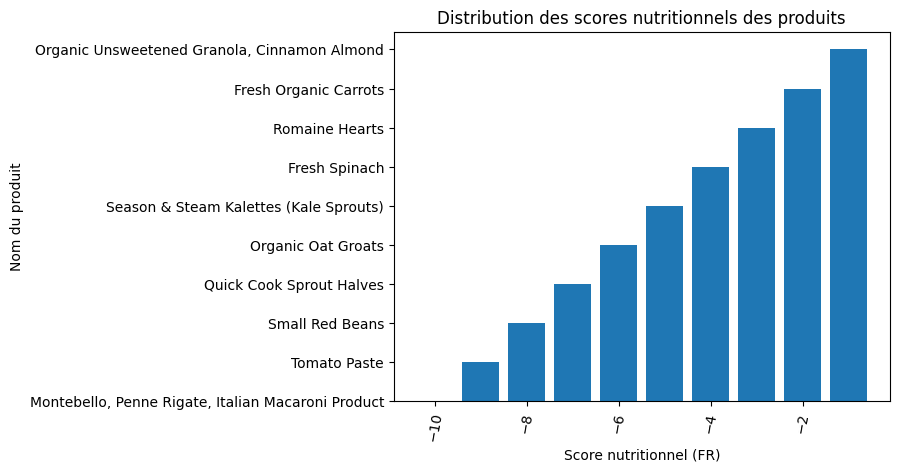

In [70]:
# On prépare les données pour le graphique
product_names = dfusa_produits['Nom du produit'].astype(str)
scoresusa = dfusa_produits['Score nutritionnel (FR)']

# Graphique en barres
plt.bar(scoresusa, product_names)
plt.xlabel('Score nutritionnel (FR)')
plt.ylabel('Nom du produit')
plt.title('Distribution des scores nutritionnels des produits')

# On fait pivoter les noms de produits pour qu'ils soient lisibles
plt.xticks(rotation=80)

plt.show()

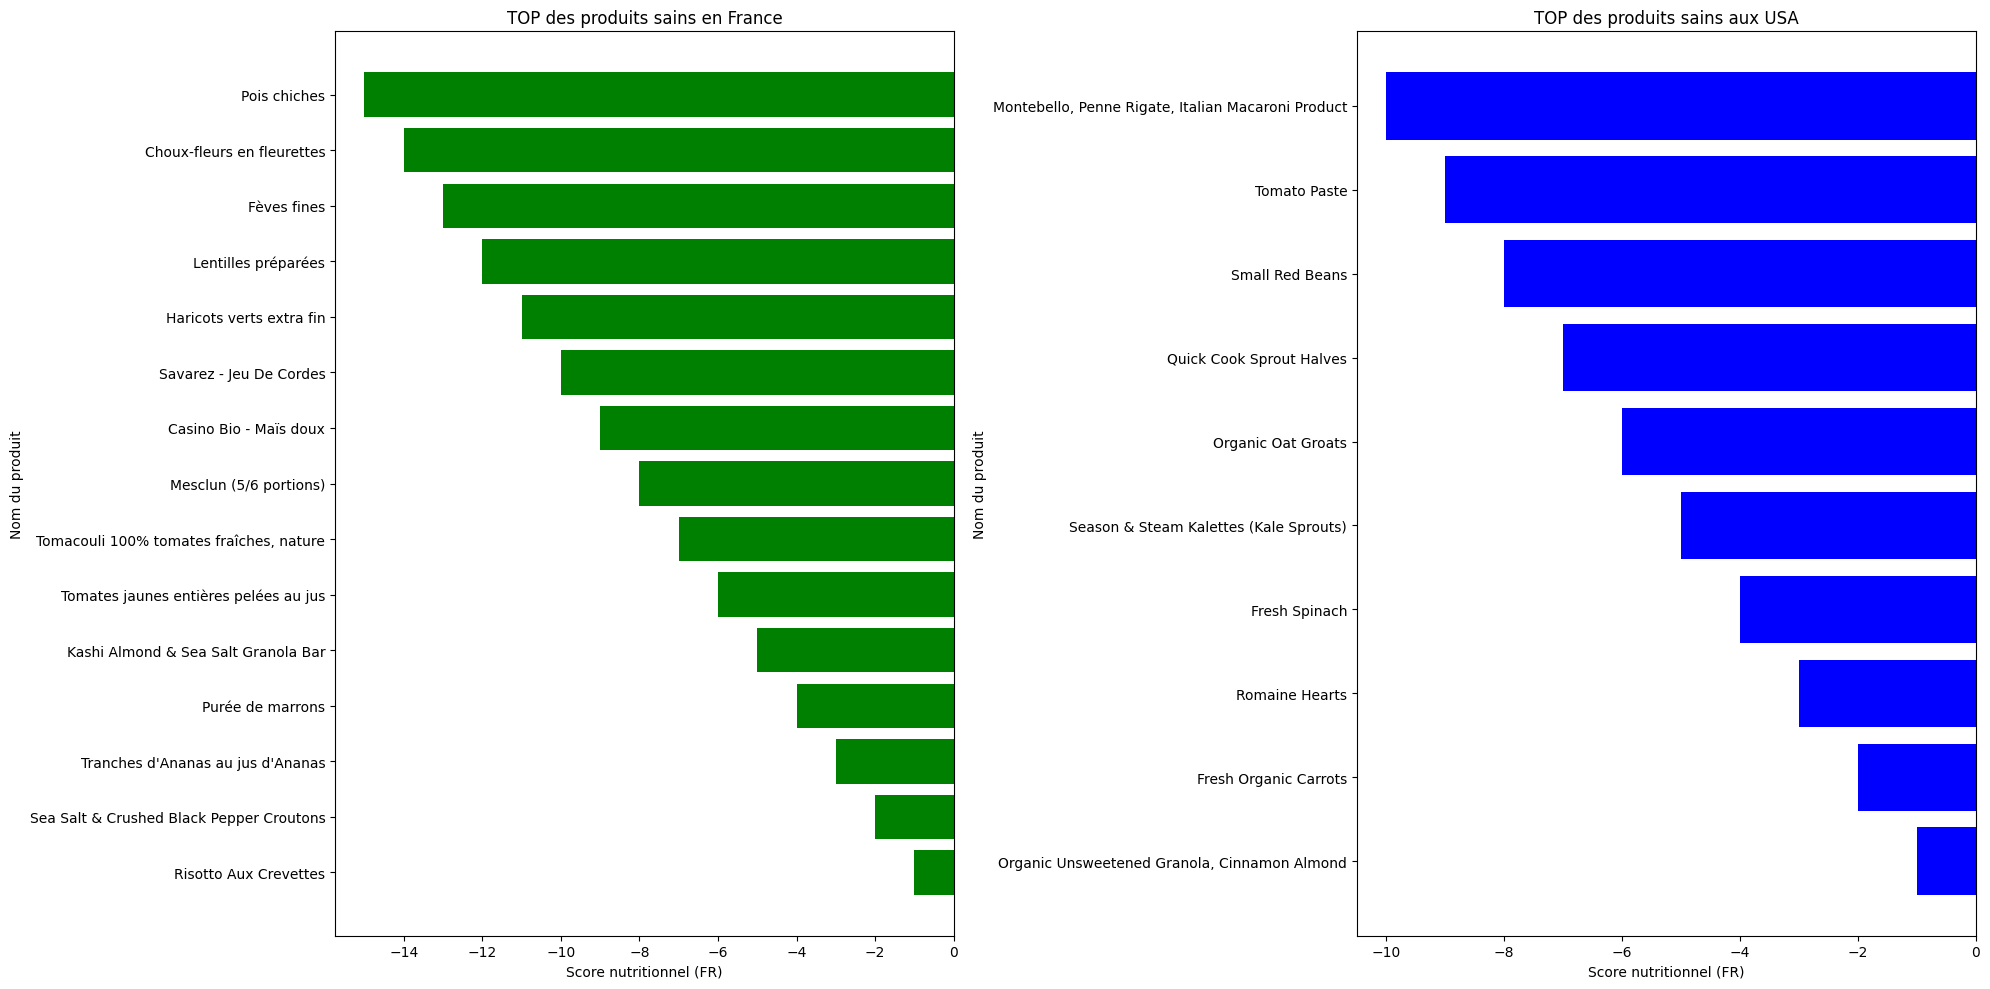

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# On prépare les données pour les graphiques
product_names_fr = df_produits['Nom du produit'].astype(str)
product_names_usa = dfusa_produits['Nom du produit'].astype(str)
scores_fr = df_produits['Score nutritionnel (FR)']
scores_usa = dfusa_produits['Score nutritionnel (FR)']

# Premier graphique en barres pour la France
axes[0].barh(product_names_fr, scores_fr, color='green')
axes[0].set_xlabel('Score nutritionnel (FR)')
axes[0].set_ylabel('Nom du produit')
axes[0].set_title('TOP des produits sains en France')
axes[0].invert_yaxis()  # Pour avoir les produits avec les scores les plus bas en haut

# Deuxième graphique en barres pour les USA
axes[1].barh(product_names_usa, scores_usa, color='blue')
axes[1].set_xlabel('Score nutritionnel (FR)')
axes[1].set_ylabel('Nom du produit')
axes[1].set_title('TOP des produits sains aux USA')
axes[1].invert_yaxis()  # Pour avoir les produits avec les scores les plus bas en haut

# Affichage des graphiques
plt.tight_layout()
plt.show()